# Test: Distributed/Statistical Analysis/ANOVA

## Analysis of variance
Analysis of variance (ANOVA) is used to study the behavior of a quantitative variable to be explained in terms of one or more categorical nominal variables. In the ANOVA setting, the observed variance in a particular variable is partitioned into components attributable to different sources of variation. In its simplest form, ANOVA provides a statistical test of whether the population means of several groups are equal, and therefore generalizes the t-test to more than two groups.

## Preliminary analysis
- Outliers may have a considerable influence on statistical conclusion. They have to be consider carefully, and possibly left out. The identification of outliers may be performed by the median's test (Leys et al., 2013) for instance. 

- ANOVA relies on two crutial assumptions : the normality of the residuals and the homogeneity of variances. Before interpreting results, we should verify that these assumptions have been met. To assess the normality of the residuals, we can plot a QQplot or use the Kolmogorov-Smirnov's test. If the test fails, we should prefer the nonparametric Kruskal–Wallis test. To assess the homogeneity of variance, we can perform the Levenne's test. 

- Cautions: performing ANOVA on unbalanced data is always possible, but interpretation of results is complexe. It is better to use a linear regression model.    

## Implementation



Download study database from the subproject: sample-data-db-setup

In [16]:
import pandas as pd
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm

data = pd.read_csv('Data/desd-synthdata.csv')
data.head()

,subjectcode,subjectage,subjectageyears,gender,_3rdventricle,_4thventricle,rightaccumbensarea,leftaccumbensarea,rightamygdala,leftamygdala,...,rs3851179_a,rs17125944_c,rs10498633_t,rs3764650_g,rs3865444_t,rs2718058_g,fdg,pib,av45,tiv
0,desd1,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,desd2,63.0,63.0,M,1.7427,1.8381,0.41218,0.46676,0.89412,0.95116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,desd3,67.0,67.0,M,2.0299,2.3463,0.37023,0.38063,0.86274,0.89655,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,desd4,NaN,NaN,M,1.5226,3.2169,0.41779,0.46245,0.86853,0.89788,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,desd5,71.0,71.0,M,1.9663,2.5945,0.31503,0.30522,0.68437,0.70803,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# only use to retrieve column names
# data.columns.values.tolist()

Show the results of ANOVA in a workable format for publication.

In [25]:
dep_var = "righthippocampus"
indep_vars = "C(gender) * C(agegroup)"
formula = str.format("%s ~ %s" % (dep_var, indep_vars))
lm = sm.ols(data = data, formula = formula).fit()
anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(gender),1.0,19.602861,19.602861,154.622448,6.734873e-33
C(agegroup),4.0,5.942986,1.485746,11.719195,2.763876e-09
C(gender):C(agegroup),4.0,0.467794,0.116949,0.922461,4.501034e-01
Residual,910.0,115.368781,0.126779,NaN,NaN


### Code limitations
- It is not impossible to have more than 8 covariables.

In [ ]:
from pyvttbl import DataFrame
df=DataFrame()
df.read_tbl(datafile)
df['id'] = xrange(len(df['len']))

print(df.anova('len', sub='id', bfactors=['supp', 'dose']))

## Supplemntay tests proposal
### Data visualization

The first proposal concerns the visualization of data. We can first display the distribution of each group. This is difficult when there is too many variables. 

/Users/phenixt/anaconda3/envs/Statistics/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


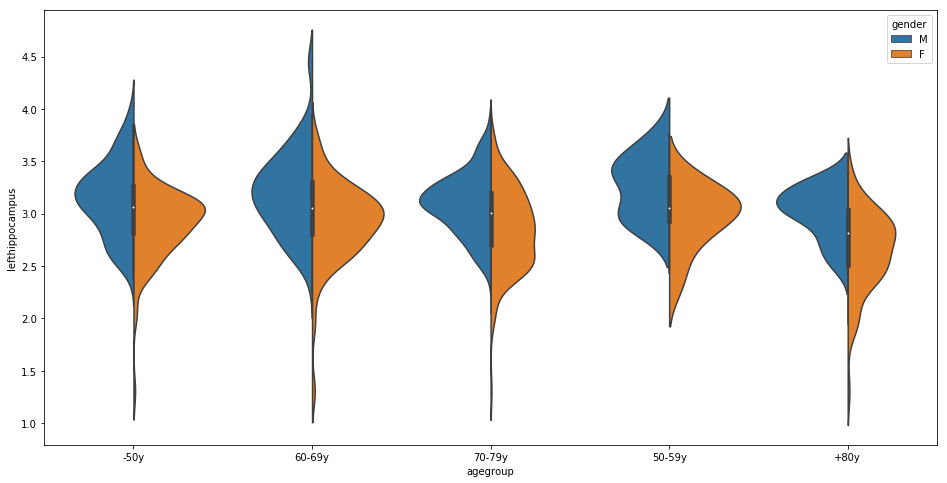

In [61]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
ax = sns.violinplot(x = "agegroup", y = "lefthippocampus", hue="gender", data = data, split=True)

We can also show the repartition of the sample in each group. To have a valid interpretation of the results of the ANOVA, the group must be balanced.

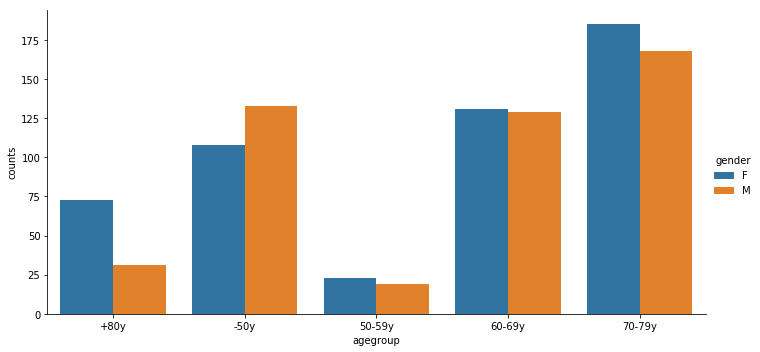

In [60]:
dataCount = data.groupby(['agegroup','gender']).size().reset_index(name='counts')
ax = sns.catplot(x = "agegroup", y ='counts', hue = "gender", data = dataCount, aspect = 2., kind = 'bar')

### Test of normality
First visualization of the quartile-quartile plot

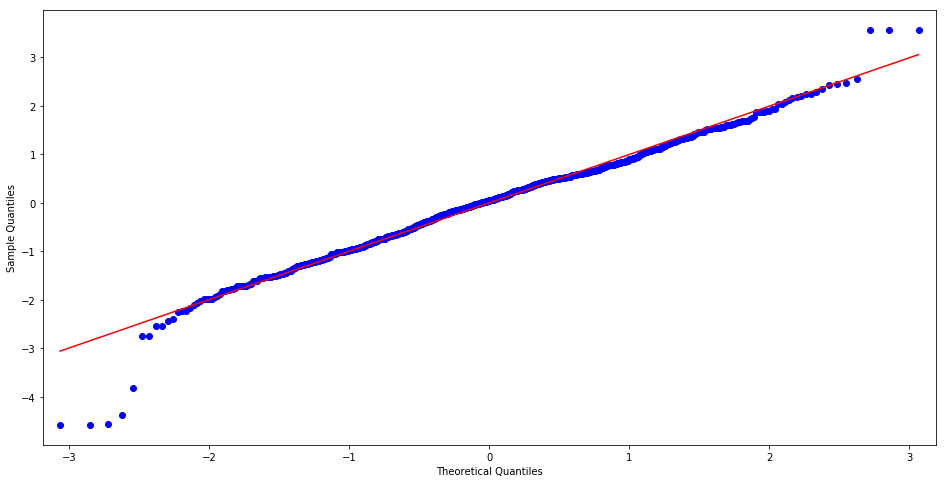

In [85]:
import statsmodels.api as sm
residu = lm.resid_pearson
sm.qqplot(residu, fit = True, line = 'r');

In [87]:
from scipy import stats
stats.shapiro(residu)

(0.9822567701339722, 3.896207800835327e-09)